### Prof. Pedram Jahangiry


![logo](https://upload.wikimedia.org/wikipedia/commons/4/44/Huntsman-Wordmark-with-USU-Blue.gif#center) 

<a href="https://colab.research.google.com/github/PJalgotrader/Deep_Learning-USU/blob/main/Lectures%20and%20codes/Module%206-%20Deep%20Sequence%20Modeling/python/univariate_ts/Module%206-%20Univariate%20forecasting_returns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> 



## 🔗 Links

[![linkedin](https://img.shields.io/badge/LinkedIn-0A66C2?style=for-the-badge&logo=linkedin&logoColor=white)](https://www.linkedin.com/in/pedram-jahangiry-cfa-5778015a)

[![Youtube](https://img.shields.io/badge/youtube_channel-1DA1F2?style=for-the-badge&logo=youtube&logoColor=white&color=FF0000)](https://www.youtube.com/channel/UCNDElcuuyX-2pSatVBDpJJQ)

[![Twitter URL](https://img.shields.io/twitter/url/https/twitter.com/PedramJahangiry.svg?style=social&label=Follow%20%40PedramJahangiry)](https://twitter.com/PedramJahangiry)


---


# Module 6: Deep Sequence Modeling (Univariate timeseries forecasting)

Can we predict stock market returns with LSTM? 

# Installation

* If you want to run your code on Google Colab, there is no installation required. (recommended for the course)
* If you want to run your code locally, then you need to install tensorflow first: https://www.tensorflow.org/install


In [1]:
import tensorflow 
tensorflow.__version__

'2.12.0'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Importing Dataset

In [92]:
stocks = pd.read_csv("https://raw.githubusercontent.com/PJalgotrader/Deep_forecasting-USU/main/data/yfinance.csv", index_col=0, header=[0,1])
stocks.head()

Adj Close                                                 \
                 AAPL         GLD       MSFT         QQQ         SPY   
Date                                                                   
2018-01-02  40.950497  125.150002  80.940392  153.123489  246.766678   
2018-01-03  40.943367  124.820000  81.317093  154.611298  248.327499   
2018-01-04  41.133541  125.459999  82.032768  154.881836  249.374115   
2018-01-05  41.601864  125.330002  83.049835  156.437332  251.035934   
2018-01-08  41.447350  125.309998  83.134598  157.045990  251.495041   

                                      Close                         ...  \
                 TSLA        USO       AAPL         GLD       MSFT  ...   
Date                                                                ...   
2018-01-02  21.368668  96.559998  43.064999  125.150002  85.949997  ...   
2018-01-03  21.150000  98.720001  43.057499  124.820000  86.349998  ...   
2018-01-04  20.974667  98.959999  43.257500  125.459999  87.110001  ...   
2018-01-05  21.105333  98.480003  43.750000  125.330002  88.190002  ...   
2018-01-08  22.427334  99.040001  43.587502  125.309998  88.279999  ...   

                  Open                           Volume                      \
                   SPY       TSLA        USO       AAPL       GLD      MSFT   
Date                                                                          
2018-01-02  267.839996  20.799999  96.559998  102223600  11762500  22483800   
2018-01-03  268.959991  21.400000  97.360001  118071600   7904300  26061400   
2018-01-04  271.200012  20.858000  98.639999   89738400   7329700  21912000   
2018-01-05  272.510010  21.108000  98.239998   94640000   5739900  23407100   
2018-01-08  273.309998  21.066668  98.480003   82271200   3566700  22113000   

                                                    
                 QQQ       SPY       TSLA      USO  
Date                                                
2018-01-02  32573300  86655700   65283000  1497588  
2018-01-03  29383600  90070400   67822500  2156150  
2018-01-04  24776100  80636400  149194500  1480988  
2018-01-05  26992300  83524000   68868000  1609888  
2018-01-08  23159100  57319200  147891000  1229225  

[5 rows x 42 columns]

In [93]:
stocks.index = pd.to_datetime(stocks.index).to_period('B')
stocks.index

PeriodIndex(['2018-01-02', '2018-01-03', '2018-01-04', '2018-01-05',
             '2018-01-08', '2018-01-09', '2018-01-10', '2018-01-11',
             '2018-01-12', '2018-01-16',
             ...
             '2022-12-16', '2022-12-19', '2022-12-20', '2022-12-21',
             '2022-12-22', '2022-12-23', '2022-12-27', '2022-12-28',
             '2022-12-29', '2022-12-30'],
            dtype='period[B]', name='Date', length=1259)

In [94]:
df = stocks['Close'][['AAPL']]
df.head()

,AAPL
Date,
2018-01-02,43.064999
2018-01-03,43.057499
2018-01-04,43.257500
2018-01-05,43.750000
2018-01-08,43.587502


In [95]:
idx = pd.period_range(min(df.index), max(df.index))
df = df.reindex(idx, fill_value=np.nan)
df = df.fillna(method = 'ffill')
df.tail(10)


,AAPL
2022-12-19,132.369995
2022-12-20,132.300003
2022-12-21,135.449997
2022-12-22,132.229996
2022-12-23,131.860001
2022-12-26,131.860001
2022-12-27,130.029999
2022-12-28,126.040001
2022-12-29,129.610001
2022-12-30,129.929993


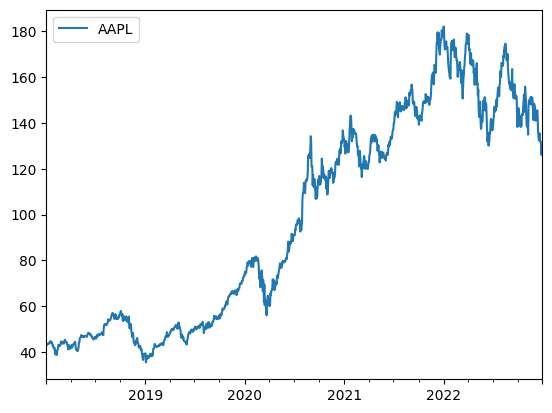

In [96]:
df.plot()
plt.show()

## Preparing the data

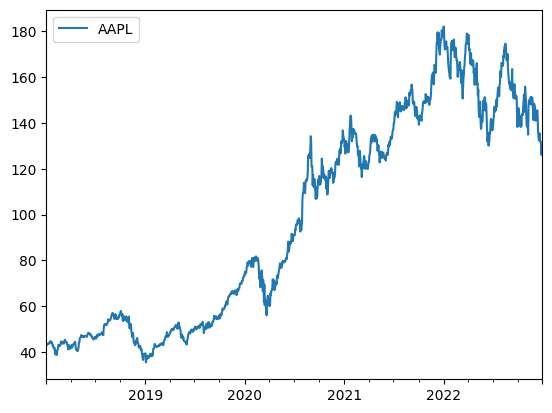

In [97]:
df.plot()
plt.show()

In [98]:
# the data is clearly not stationary. We will go ahead and use the log returns
df['LogAAPL']= np.log(df['AAPL'])
df['DiffLogAAPL']= df['LogAAPL'].diff(1)

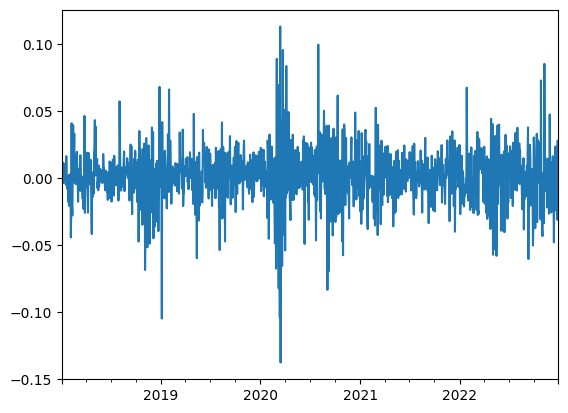

In [99]:
df['DiffLogAAPL'].plot()
plt.show()

In [100]:
df.head()

,AAPL,LogAAPL,DiffLogAAPL
2018-01-02,43.064999,3.762711,NaN
2018-01-03,43.057499,3.762536,-0.000174
2018-01-04,43.257500,3.767171,0.004634
2018-01-05,43.750000,3.778492,0.011321
2018-01-08,43.587502,3.774770,-0.003721


In [101]:
df_raw = df.copy()



## Normalizing the data

In [12]:
# in this example, because we work with stationary DiffLogAAPL, we don't need to normalize the data. If you want, you cant try running the following:

# mean = df[:num_train_samples].mean(axis=0)
# df -= mean
#std = df[:num_train_samples].std(axis=0)
# df /= std

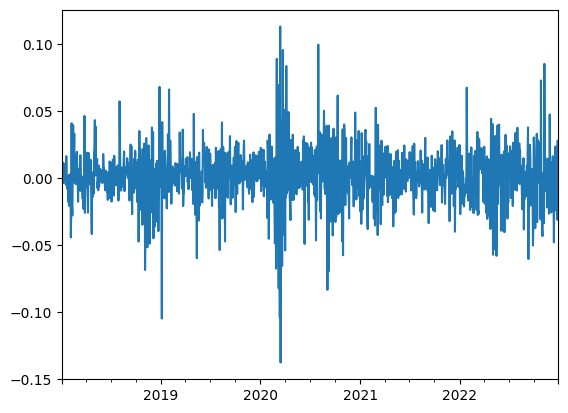

In [13]:
df['DiffLogAAPL'].plot()
plt.show()

## Splitting the data

**Computing the number of samples we'll use for each data split** 

In [14]:
len(df)

1304

In [15]:
num_train_samples = int(0.6 * len(df))
num_val_samples = int(0.2 * len(df))
num_test_samples = len(df) - num_train_samples - num_val_samples
print("num_train_samples:", num_train_samples)
print("num_val_samples:", num_val_samples)
print("num_test_samples:", num_test_samples)

num_train_samples: 782
num_val_samples: 260
num_test_samples: 262


## Time series batch generator
**Instantiating datasets for training, validation, and testing**
https://www.tensorflow.org/api_docs/python/tf/keras/utils/timeseries_dataset_from_array

* We have seen this before: Module 6- Python1- Master Multi-Feature Timeseries Forecasting with LSTM in TensorFlow https://youtu.be/JDgf__aRS68

In [16]:
# recall
print("num_train_samples:", num_train_samples)
print("num_val_samples:", num_val_samples)
print("num_test_samples:", num_test_samples)

num_train_samples: 782
num_val_samples: 260
num_test_samples: 262


In [17]:
import numpy as np
from tensorflow import keras

int_sequence = np.arange(13)
batch_size = 3 # Number of timeseries samples in each batch (except maybe the last one). If None, the data will not be batched (the dataset will yield individual samples).
sequence_length = 5 # Length of the output sequences (in number of timesteps).
h = 1 # number of h steps ahead for forecasting
delay = sequence_length + h -1  # number of delayed timesteps to start predictions

dummy_dataset = keras.utils.timeseries_dataset_from_array(
    data=int_sequence[:-delay],
    targets=int_sequence[delay:],
    sequence_length=sequence_length,
    sequence_stride= 1, # Number of timesteps between two consecutive output sequences.
    batch_size=batch_size, 
    shuffle = True, # Whether to shuffle output samples, or instead draw them in chronological order.
)

for inputs, targets in dummy_dataset:
  print(inputs, targets)

tf.Tensor(
[[3 4 5 6 7]
 [2 3 4 5 6]
 [0 1 2 3 4]], shape=(3, 5), dtype=int64) tf.Tensor([8 7 5], shape=(3,), dtype=int64)
tf.Tensor([[1 2 3 4 5]], shape=(1, 5), dtype=int64) tf.Tensor([6], shape=(1,), dtype=int64)


In [18]:
series = df['DiffLogAAPL'].dropna().to_numpy()
sequence_length = 60 # using the past 60 days to predict next day. 
h = 1 
delay = sequence_length  + h - 1
batch_size = 32

train_dataset = keras.utils.timeseries_dataset_from_array(
    data = series[:-delay],
    targets=series[delay:],
    sequence_length=sequence_length,
    shuffle=False,
    batch_size=batch_size,
    start_index=0,
    end_index=num_train_samples)

val_dataset = keras.utils.timeseries_dataset_from_array(
    data = series[:-delay],
    targets=series[delay:],
    sequence_length=sequence_length,
    shuffle=False,
    batch_size=batch_size,
    start_index=num_train_samples,
    end_index=num_train_samples + num_val_samples)

test_dataset = keras.utils.timeseries_dataset_from_array(
    data = series[:-delay],
    targets=series[delay:],
    sequence_length=sequence_length,
    shuffle=False,
    batch_size=batch_size,
    start_index=num_train_samples + num_val_samples)

In [19]:
for inputs, targets in test_dataset.take(1):
  print(inputs, targets)

tf.Tensor(
[[-0.00354156  0.02469666 -0.01277282 ...  0.02058722  0.00819991
   0.02242455]
 [ 0.02469666 -0.01277282 -0.02696006 ...  0.00819991  0.02242455
   0.00372714]
 [-0.01277282 -0.02696006 -0.01683424 ...  0.02242455  0.00372714
   0.00502402]
 ...
 [-0.02388175 -0.02042562  0.00142217 ...  0.00196453  0.00957662
   0.04018979]
 [-0.02042562  0.00142217  0.02288851 ...  0.00957662  0.04018979
  -0.0573285 ]
 [ 0.00142217  0.02288851 -0.00138988 ...  0.04018979 -0.0573285
   0.00324786]], shape=(32, 60), dtype=float64) tf.Tensor(
[ 0.00372714  0.00502402  0.01895364 -0.00667175 -0.01793568 -0.00171961
  0.02341711 -0.01912367 -0.01862313  0.00180247 -0.01198041 -0.02584706
  0.01145751  0.01621044 -0.03044711  0.         -0.0013318   0.01401645
 -0.00101604 -0.00485538 -0.02821555  0.00671461 -0.03804264 -0.00146789
  0.04416565 -0.03729154  0.00196453  0.00957662  0.04018979 -0.0573285
  0.00324786 -0.03375248], shape=(32,), dtype=float64)


In [20]:
for samples, targets in train_dataset.take(1):
    print("samples shape:", samples.shape)
    print("targets shape:", targets.shape)
    

samples shape: (32, 60)
targets shape: (32,)


# A common-sense, non-machine-learning baseline

In [21]:
def evaluate_naive_method(dataset):
    total_abs_err = 0.
    samples_seen = 0
    for samples, targets in dataset:
        preds = samples[:, -1] 
        total_abs_err += np.sum(np.abs(preds - targets))
        samples_seen += samples.shape[0]
    return total_abs_err / samples_seen


In [22]:
print(f"Validation MAE: {evaluate_naive_method(val_dataset):.3f}")
print(f"Test MAE: {evaluate_naive_method(test_dataset):.3f}")

# the unit is DiffLogAAPL

Validation MAE: 0.015
Test MAE: 0.026


In [23]:
test_performance = {} 
test_performance['Baseline'] = evaluate_naive_method(test_dataset)
test_performance

{'Baseline': 0.02571843123112198}

# Simple RNN

In [24]:
from tensorflow.keras import layers

In [25]:
sequence_length

60

In [26]:
n_features = 1

In [27]:
inputs = keras.Input(shape=(sequence_length, n_features))
x = layers.SimpleRNN(16)(inputs)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

model.summary() 


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 60, 1)]           0         
                                                                 
 simple_rnn (SimpleRNN)      (None, 16)                288       
                                                                 
 dense (Dense)               (None, 1)                 17        
                                                                 
Total params: 305
Trainable params: 305
Non-trainable params: 0
_________________________________________________________________


In [28]:
# parameters = (1 (feature) * 16 (cells) ) + (16 * 16) hidden state weight matrix + 16 bias terms
1*16 + 16*16 + 16

288

In [29]:
callbacks = [
    keras.callbacks.ModelCheckpoint("RNN.keras",
                                    save_best_only=True)
]
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
history = model.fit(train_dataset,
                    epochs=20,
                    validation_data=val_dataset,
                    callbacks=callbacks)


Epoch 1/20
23/23 [==============================] - 8s 55ms/step - loss: 0.0033 - mae: 0.0417 - val_loss: 7.1772e-04 - val_mae: 0.0213
Epoch 2/20
23/23 [==============================] - 1s 48ms/step - loss: 0.0014 - mae: 0.0277 - val_loss: 4.4052e-04 - val_mae: 0.0167
Epoch 3/20
23/23 [==============================] - 1s 44ms/step - loss: 9.4787e-04 - mae: 0.0223 - val_loss: 2.9587e-04 - val_mae: 0.0138
Epoch 4/20
23/23 [==============================] - 1s 52ms/step - loss: 6.9656e-04 - mae: 0.0187 - val_loss: 2.3342e-04 - val_mae: 0.0123
Epoch 5/20
23/23 [==============================] - 2s 79ms/step - loss: 5.9507e-04 - mae: 0.0170 - val_loss: 2.1220e-04 - val_mae: 0.0117
Epoch 6/20
23/23 [==============================] - 1s 49ms/step - loss: 5.4872e-04 - mae: 0.0162 - val_loss: 2.0241e-04 - val_mae: 0.0113
Epoch 7/20
23/23 [==============================] - 1s 53ms/step - loss: 5.2518e-04 - mae: 0.0158 - val_loss: 1.9744e-04 - val_mae: 0.0111
Epoch 8/20
23/23 [=================

In [30]:
model = keras.models.load_model("RNN.keras")
print(f"Test MAE: {model.evaluate(test_dataset)[1]:.5f}")

5/5 [==============================] - 0s 10ms/step - loss: 5.2737e-04 - mae: 0.0177
Test MAE: 0.01774


In [31]:
test_performance['SimpleRNN'] = model.evaluate(test_dataset, verbose=0)[1]
test_performance

{'Baseline': 0.02571843123112198, 'SimpleRNN': 0.017744194716215134}

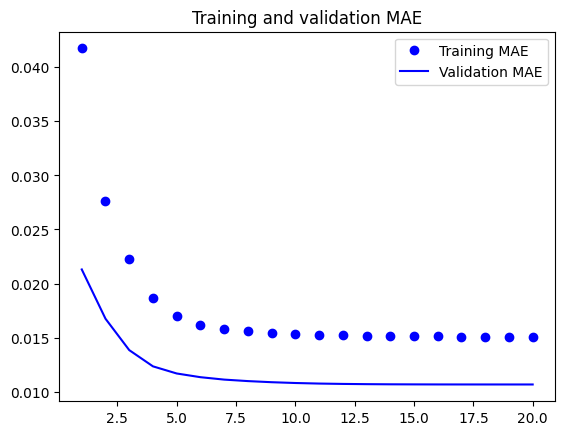

In [32]:
import matplotlib.pyplot as plt
loss = history.history["mae"]
val_loss = history.history["val_mae"]
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, "bo", label="Training MAE")
plt.plot(epochs, val_loss, "b", label="Validation MAE")
plt.title("Training and validation MAE")
plt.legend()
plt.show()

#  LSTM 

In [33]:
inputs = keras.Input(shape=(sequence_length, n_features))
x = layers.LSTM(16)(inputs)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

model.summary() 


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 60, 1)]           0         
                                                                 
 lstm (LSTM)                 (None, 16)                1152      
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 1,169
Trainable params: 1,169
Non-trainable params: 0
_________________________________________________________________


In [34]:
# parameters = [(1 (feature) * 16 (cells) ) + (16 * 16) hidden state weight matrix + 16 bias terms ] * 4 gates
(1*16 + 16*16 + 16) *4

1152

In [35]:
callbacks = [
    keras.callbacks.ModelCheckpoint("LSTM.keras",
                                    save_best_only=True)
]
model.compile(optimizer="adam", loss="mse", metrics=["mae"])
history = model.fit(train_dataset,
                    epochs=20,
                    validation_data=val_dataset,
                    callbacks=callbacks)


Epoch 1/20
23/23 [==============================] - 4s 45ms/step - loss: 5.0483e-04 - mae: 0.0154 - val_loss: 1.8323e-04 - val_mae: 0.0104
Epoch 2/20
23/23 [==============================] - 0s 13ms/step - loss: 4.8825e-04 - mae: 0.0150 - val_loss: 1.9115e-04 - val_mae: 0.0107
Epoch 3/20
23/23 [==============================] - 0s 14ms/step - loss: 4.9153e-04 - mae: 0.0151 - val_loss: 1.9664e-04 - val_mae: 0.0110
Epoch 4/20
23/23 [==============================] - 0s 13ms/step - loss: 4.9229e-04 - mae: 0.0152 - val_loss: 1.9889e-04 - val_mae: 0.0111
Epoch 5/20
23/23 [==============================] - 0s 13ms/step - loss: 4.9258e-04 - mae: 0.0152 - val_loss: 1.9843e-04 - val_mae: 0.0110
Epoch 6/20
23/23 [==============================] - 0s 13ms/step - loss: 4.9271e-04 - mae: 0.0151 - val_loss: 1.9525e-04 - val_mae: 0.0109
Epoch 7/20
23/23 [==============================] - 0s 12ms/step - loss: 4.9215e-04 - mae: 0.0151 - val_loss: 1.9120e-04 - val_mae: 0.0108
Epoch 8/20
23/23 [=========

In [36]:
model = keras.models.load_model("LSTM.keras")
print(f"Test MAE: {model.evaluate(test_dataset)[1]:.5f}")

5/5 [==============================] - 1s 10ms/step - loss: 5.0465e-04 - mae: 0.0172
Test MAE: 0.01719


In [37]:
test_performance['LSTM'] = model.evaluate(test_dataset, verbose=0)[1]
test_performance

{'Baseline': 0.02571843123112198,
 'SimpleRNN': 0.017744194716215134,
 'LSTM': 0.01718537136912346}

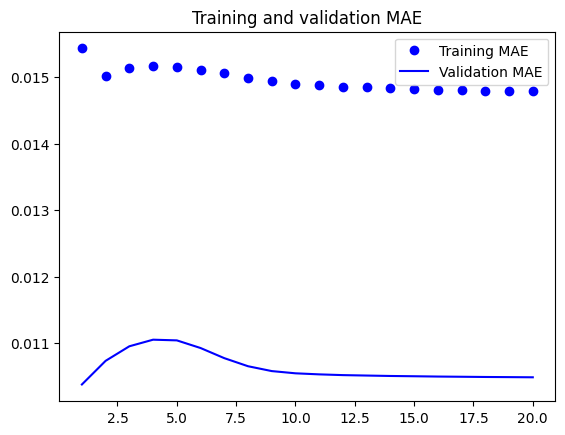

In [38]:
loss = history.history["mae"]
val_loss = history.history["val_mae"]
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, "bo", label="Training MAE")
plt.plot(epochs, val_loss, "b", label="Validation MAE")
plt.title("Training and validation MAE")
plt.legend()
plt.show()

# More complex models with regularization

In [39]:
# We can stack multiple LSTM layers and add regularization.  

inputs = keras.Input(shape=(sequence_length, n_features))
x = layers.LSTM(128, recurrent_dropout=0.1, return_sequences=True)(inputs)
x = layers.SimpleRNN(128, recurrent_dropout=0.1)(x)

x = layers.Dropout(0.1)(x)

outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

callbacks = [
    keras.callbacks.ModelCheckpoint("Stacked_regularized.keras",
                                    save_best_only=True)
]

model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
history = model.fit(train_dataset,
                    epochs=20,
                    validation_data=val_dataset,
                    callbacks=callbacks)


Epoch 1/20
23/23 [==============================] - 10s 288ms/step - loss: 0.0552 - mae: 0.1800 - val_loss: 2.6978e-04 - val_mae: 0.0133
Epoch 2/20
23/23 [==============================] - 6s 259ms/step - loss: 0.0082 - mae: 0.0652 - val_loss: 2.6033e-04 - val_mae: 0.0130
Epoch 3/20
23/23 [==============================] - 7s 317ms/step - loss: 0.0012 - mae: 0.0266 - val_loss: 2.0591e-04 - val_mae: 0.0111
Epoch 4/20
23/23 [==============================] - 6s 253ms/step - loss: 8.9898e-04 - mae: 0.0225 - val_loss: 2.3958e-04 - val_mae: 0.0125
Epoch 5/20
23/23 [==============================] - 7s 315ms/step - loss: 7.4162e-04 - mae: 0.0199 - val_loss: 2.2427e-04 - val_mae: 0.0118
Epoch 6/20
23/23 [==============================] - 7s 308ms/step - loss: 6.9036e-04 - mae: 0.0188 - val_loss: 1.8259e-04 - val_mae: 0.0104
Epoch 7/20
23/23 [==============================] - 6s 254ms/step - loss: 6.8243e-04 - mae: 0.0191 - val_loss: 1.8242e-04 - val_mae: 0.0104
Epoch 8/20
23/23 [=============

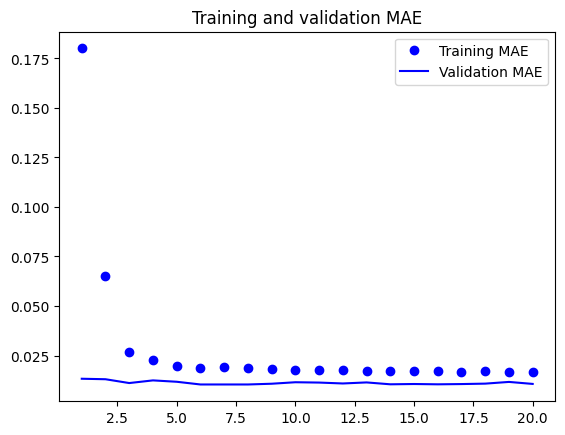

In [40]:
loss = history.history["mae"]
val_loss = history.history["val_mae"]
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, "bo", label="Training MAE")
plt.plot(epochs, val_loss, "b", label="Validation MAE")
plt.title("Training and validation MAE")
plt.legend()
plt.show()

In [41]:
model = keras.models.load_model("Stacked_regularized.keras")
print(f"Test MAE: {model.evaluate(test_dataset)[1]:.5f}")


5/5 [==============================] - 1s 26ms/step - loss: 4.9596e-04 - mae: 0.0170
Test MAE: 0.01701


In [42]:
test_performance['Stacked_RNN'] = model.evaluate(test_dataset, verbose=0)[1]
test_performance

{'Baseline': 0.02571843123112198,
 'SimpleRNN': 0.017744194716215134,
 'LSTM': 0.01718537136912346,
 'Stacked_RNN': 0.017009852454066277}

# Bidirectional RNN? 

In [43]:
inputs = keras.Input(shape=(sequence_length, n_features))
x = layers.Bidirectional(layers.SimpleRNN(32))(inputs)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

callbacks = [
    keras.callbacks.ModelCheckpoint("bidirectional_RNN.keras",
                                    save_best_only=True)
]

model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
history = model.fit(train_dataset,
                    epochs=20,
                    validation_data=val_dataset, 
                    callbacks=callbacks)

Epoch 1/20
23/23 [==============================] - 5s 135ms/step - loss: 0.0039 - mae: 0.0382 - val_loss: 3.3080e-04 - val_mae: 0.0142
Epoch 2/20
23/23 [==============================] - 2s 78ms/step - loss: 7.7542e-04 - mae: 0.0205 - val_loss: 2.7132e-04 - val_mae: 0.0131
Epoch 3/20
23/23 [==============================] - 2s 77ms/step - loss: 6.8787e-04 - mae: 0.0195 - val_loss: 2.4771e-04 - val_mae: 0.0122
Epoch 4/20
23/23 [==============================] - 2s 78ms/step - loss: 6.3552e-04 - mae: 0.0187 - val_loss: 2.4118e-04 - val_mae: 0.0120
Epoch 5/20
23/23 [==============================] - 2s 79ms/step - loss: 5.9334e-04 - mae: 0.0179 - val_loss: 2.3288e-04 - val_mae: 0.0118
Epoch 6/20
23/23 [==============================] - 3s 121ms/step - loss: 5.6429e-04 - mae: 0.0174 - val_loss: 2.2792e-04 - val_mae: 0.0115
Epoch 7/20
23/23 [==============================] - 2s 74ms/step - loss: 5.4296e-04 - mae: 0.0169 - val_loss: 2.2566e-04 - val_mae: 0.0114
Epoch 8/20
23/23 [===========

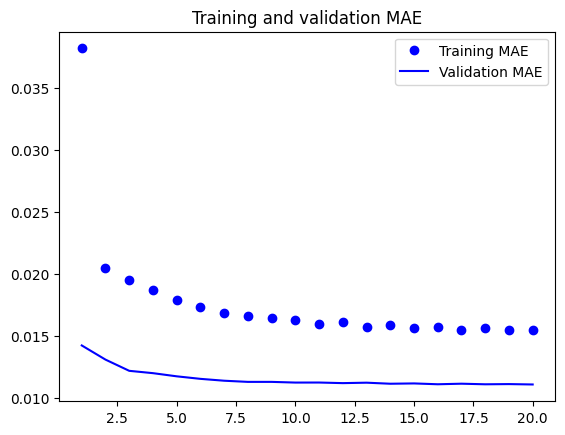

In [44]:
loss = history.history["mae"]
val_loss = history.history["val_mae"]
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, "bo", label="Training MAE")
plt.plot(epochs, val_loss, "b", label="Validation MAE")
plt.title("Training and validation MAE")
plt.legend()
plt.show()

In [45]:
model = keras.models.load_model("bidirectional_RNN.keras")
print(f"Test MAE: {model.evaluate(test_dataset)[1]:.5f}")


5/5 [==============================] - 0s 14ms/step - loss: 5.1551e-04 - mae: 0.0173
Test MAE: 0.01734


In [46]:
test_performance['Bidirectional_RNN'] = model.evaluate(test_dataset, verbose=0)[1]
test_performance

{'Baseline': 0.02571843123112198,
 'SimpleRNN': 0.017744194716215134,
 'LSTM': 0.01718537136912346,
 'Stacked_RNN': 0.017009852454066277,
 'Bidirectional_RNN': 0.017338113859295845}

# Model Comparison

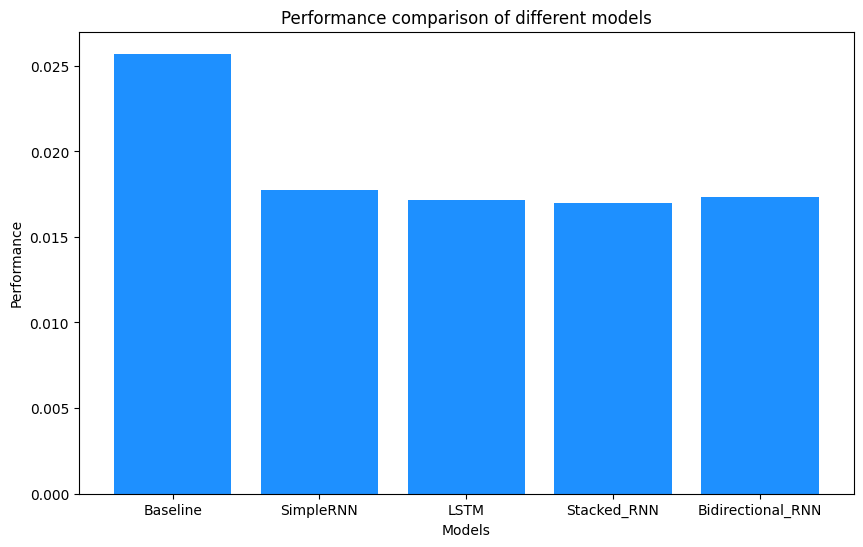

In [47]:
# get keys and values
models = list(test_performance.keys())
values = list(test_performance.values())

# create bar chart
plt.figure(figsize=(10, 6))
plt.bar(models, values, color='dodgerblue')

plt.xlabel('Models')
plt.ylabel('Performance')
plt.title('Performance comparison of different models')
plt.show()

# Predictions

There are two approaches for this: 
1. TensorFlow Approach: https://www.tensorflow.org/tutorials/structured_data/time_series
2. More general Approach. 

I will cover the more general approach here. Feel free to check out the link above for TensorFlow timeseries forecasting documentation. 



In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error

In [152]:
df = df_raw.copy()
df.shape

(1304, 3)

In [153]:
df.head()

,AAPL,LogAAPL,DiffLogAAPL
2018-01-02,43.064999,3.762711,NaN
2018-01-03,43.057499,3.762536,-0.000174
2018-01-04,43.257500,3.767171,0.004634
2018-01-05,43.750000,3.778492,0.011321
2018-01-08,43.587502,3.774770,-0.003721


In [154]:
df = df[304:]
df.shape

(1000, 3)

## Splitting data

In [156]:
test_period = 100
train_period = len(df) - test_period

print("train_period:", train_period)
print("test_period:", test_period)

train_period: 900
test_period: 100


In [157]:
train = df.iloc[:train_period]
test  = df.iloc[train_period:]

In [158]:
# A Boolean series indicating which rows of the DataFrame df belong to each dataset 
train_indicator = (df.index <= train.index[-1])
test_indicator =  (df.index > train.index[-1])


## Preparing the data

In [160]:
series = df['DiffLogAAPL'].dropna().to_numpy()

Tx = 100 # using the past 100 observations to forecast the next one.
Ty = 1 # forecasting only one step ahead
X = np.array([series[t:t+Tx] for t in range(len(series) - Tx-Ty+1)]).reshape(-1, Tx, 1)
Y = np.array([series[t+Tx+Ty-1] for t in range(len(series) - Tx-Ty+1)]).reshape(-1, Ty)
N = len(X)

print("X:", X.shape, "Y:", Y.shape, "N:", N)

X: (900, 100, 1) Y: (900, 1) N: 900


In [161]:
Xtrain, Ytrain = X[:-test_period], Y[:-test_period]
Xtest, Ytest = X[-test_period:], Y[-test_period:]

In [162]:
Xtrain.shape

(800, 100, 1)

In [163]:
Xtest.shape

(100, 100, 1)

# LSTM

In [114]:
# We can stack multiple LSTM layers and add regularization.  
n_features = 1 
inputs = keras.Input(shape=(Tx, n_features))
x = layers.LSTM(16)(inputs)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

callbacks = [
    keras.callbacks.ModelCheckpoint("LSTM_singleOutput.keras",
                                    save_best_only=True)
]

model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
history = model.fit(Xtrain, Ytrain,
                    epochs=20,
                    validation_data=(Xtest,Ytest),
                    callbacks=callbacks)


Epoch 1/20
25/25 [==============================] - 2s 25ms/step - loss: 5.1581e-04 - mae: 0.0161 - val_loss: 5.5652e-04 - val_mae: 0.0175
Epoch 2/20
25/25 [==============================] - 0s 7ms/step - loss: 4.9951e-04 - mae: 0.0159 - val_loss: 5.6460e-04 - val_mae: 0.0177
Epoch 3/20
25/25 [==============================] - 0s 8ms/step - loss: 5.0122e-04 - mae: 0.0159 - val_loss: 5.5615e-04 - val_mae: 0.0175
Epoch 4/20
25/25 [==============================] - 0s 7ms/step - loss: 5.0309e-04 - mae: 0.0159 - val_loss: 5.6658e-04 - val_mae: 0.0177
Epoch 5/20
25/25 [==============================] - 0s 7ms/step - loss: 5.0238e-04 - mae: 0.0158 - val_loss: 5.6233e-04 - val_mae: 0.0177
Epoch 6/20
25/25 [==============================] - 0s 7ms/step - loss: 5.0229e-04 - mae: 0.0159 - val_loss: 5.9942e-04 - val_mae: 0.0185
Epoch 7/20
25/25 [==============================] - 0s 8ms/step - loss: 4.8958e-04 - mae: 0.0156 - val_loss: 5.5185e-04 - val_mae: 0.0174
Epoch 8/20
25/25 [===============

In [115]:
model = tf.keras.models.load_model('LSTM_singleOutput.keras')


In [116]:
train_predictions = model.predict(Xtrain).flatten()
test_predictions = model.predict(Xtest).flatten()

4/4 [==============================] - 0s 4ms/step


In [170]:
test_predictions

array([ 1.6484825e-03,  1.9011489e-03,  2.6744399e-03,  9.0387184e-06,
        2.2149943e-03,  1.7071951e-03,  2.1215889e-03,  2.4104021e-03,
        1.0261965e-03,  1.8449177e-03,  1.4762304e-03,  2.7321249e-03,
        5.9208059e-04, -5.4045185e-04,  1.2385738e-03,  7.5473182e-04,
        2.9783524e-03,  9.3491958e-04,  7.2441460e-04,  1.5949382e-03,
        2.9048936e-03,  3.8216828e-04,  7.3435495e-04,  8.1733416e-04,
        2.4365983e-03,  2.5362321e-03,  5.0692697e-04,  1.9285477e-03,
        1.1254735e-03,  2.1354819e-03,  7.9898559e-04,  6.0503115e-04,
        1.4989768e-03, -1.1422378e-03,  4.9189792e-04,  1.2764597e-03,
        1.2295448e-03,  3.7092366e-05,  2.3704041e-03,  2.1738859e-03,
        1.8354219e-03,  1.4591365e-03,  1.1635678e-03,  1.2538714e-03,
        7.2111795e-04,  1.7306824e-03,  1.3927503e-03,  1.6087166e-04,
        9.5792580e-05,  1.7819185e-03,  1.5044058e-03,  1.8770370e-03,
        2.1156126e-03, -8.0378843e-05,  1.6007958e-03,  1.4870095e-03,
      

In [172]:
test_predictions[-1:]

array([0.00072589], dtype=float32)

In [171]:
df.tail()

,AAPL,LogAAPL,DiffLogAAPL
2022-12-26,131.860001,4.881741,0.000000
2022-12-27,130.029999,4.867765,-0.013976
2022-12-28,126.040001,4.836599,-0.031166
2022-12-29,129.610001,4.864530,0.027931
2022-12-30,129.929993,4.866996,0.002466


Following is performing the reverse of the earlier log difference transformation applied on the stock prices, to get the original stock prices back. This process is important because your model was trained on the differenced log prices (DiffLogAAPL), not the actual prices. While differencing helps with modeling (it can make the time series stationary which is a common requirement for time series modeling), it's usually more meaningful to see predictions in terms of the original prices.

In [118]:
df['Lag_LogAAPL'] = df['LogAAPL'].shift(1)
lag = df['Lag_LogAAPL']

## One-step Forecast


In [174]:
train_indicator[:Tx] = False # the first Tx entries of your data cannot be used to train your model 
# because there aren't T prior observations to create a valid input sequence for the model. 

In [175]:
lag[train_indicator].shape

(800,)

In [176]:
df.loc[train_indicator, '1step_train'] = lag[train_indicator] + train_predictions
df.loc[test_indicator, '1step_test'] = lag[test_indicator] + test_predictions

In [177]:
df.iloc[99:105]

,AAPL,LogAAPL,DiffLogAAPL,1step_train,1step_test
2019-07-19,50.647499,3.924890,-0.015040,NaN,NaN
2019-07-22,51.805000,3.947487,0.022597,3.926325,NaN
2019-07-23,52.209999,3.955274,0.007787,3.949067,NaN
2019-07-24,52.167500,3.954460,-0.000814,3.956848,NaN
2019-07-25,51.755001,3.946521,-0.007939,3.955984,NaN
2019-07-26,51.935001,3.949993,0.003472,3.947984,NaN


In [178]:
df.tail()

,AAPL,LogAAPL,DiffLogAAPL,1step_train,1step_test
2022-12-26,131.860001,4.881741,0.000000,NaN,4.882945
2022-12-27,130.029999,4.867765,-0.013976,NaN,4.883278
2022-12-28,126.040001,4.836599,-0.031166,NaN,4.869029
2022-12-29,129.610001,4.864530,0.027931,NaN,4.837372
2022-12-30,129.929993,4.866996,0.002466,NaN,4.865256


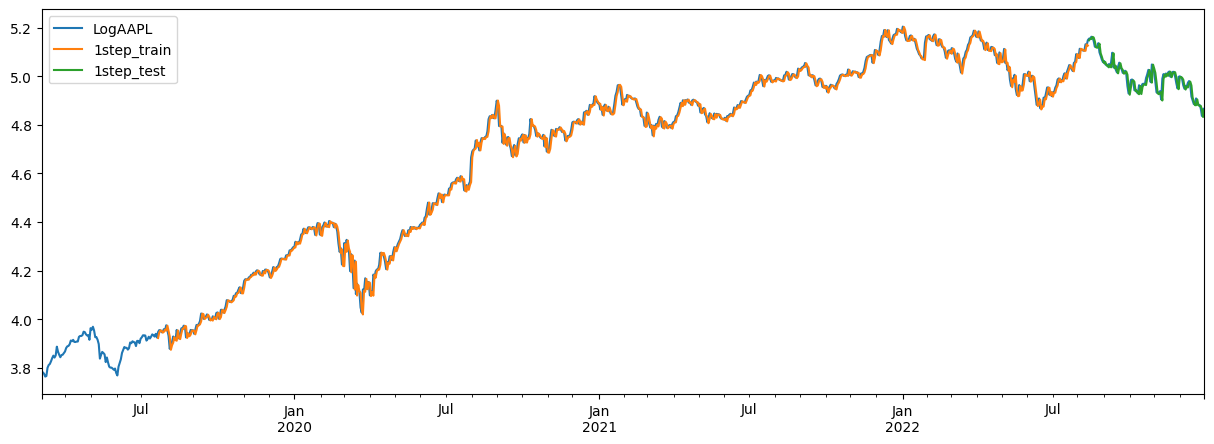

In [123]:
# plot 1-step forecast
df[['LogAAPL', '1step_train', '1step_test']].plot(figsize=(15, 5));

## Multi-step Forecast
By repeating these steps, the model is able to generate a sequence of predictions for test_period steps into the future. 

These predictions can then be used to evaluate the performance of the model over this period.

In [179]:
 Xtest.shape

(100, 100, 1)

In [180]:
Xtest[0].shape

(100, 1)

In [126]:
Xtest[0].reshape(1, -1, 1).shape

(1, 100, 1)

In [127]:
multistep_predictions = []

# first test input
last_x = Xtest[0]

# Start a loop that will continue until we have the desired number of future forecasts (test_period).
while len(multistep_predictions) < test_period:
  prediction = model.predict(last_x.reshape(1, -1, 1))[0]
  
  # update the predictions list
  multistep_predictions.append(prediction)

  # update the new input
  # The last_x array, which serves as input for the next prediction, is updated. The np.roll(last_x, -1) shifts all elements of last_x one position to the left. 
  # The last element of last_x, which is now freed up, is filled with the last prediction p.
  last_x = np.roll(last_x, -1)
  last_x[-1] = prediction


1/1 [==============================] - 0s 21ms/step


In [181]:
# Last-known train value
last_train = train.iloc[-1]['LogAAPL']

In [182]:
multistep_predictions

[array([-0.0004882], dtype=float32),
 array([-0.00054891], dtype=float32),
 array([-0.00072268], dtype=float32),
 array([-0.00093567], dtype=float32),
 array([-0.00115629], dtype=float32),
 array([-0.00136812], dtype=float32),
 array([-0.00156354], dtype=float32),
 array([-0.00173983], dtype=float32),
 array([-0.0018969], dtype=float32),
 array([-0.00203595], dtype=float32),
 array([-0.00215873], dtype=float32),
 array([-0.00226708], dtype=float32),
 array([-0.00236279], dtype=float32),
 array([-0.00244745], dtype=float32),
 array([-0.00252246], dtype=float32),
 array([-0.00258902], dtype=float32),
 array([-0.00264813], dtype=float32),
 array([-0.00270067], dtype=float32),
 array([-0.00274737], dtype=float32),
 array([-0.00278888], dtype=float32),
 array([-0.00282572], dtype=float32),
 array([-0.0028584], dtype=float32),
 array([-0.00288734], dtype=float32),
 array([-0.00291292], dtype=float32),
 array([-0.00293548], dtype=float32),
 array([-0.00295534], dtype=float32),
 array([-0.0029

In [184]:
# save multi-step forecast to dataframe
df.loc[test_indicator, 'multistep_test'] = last_train + np.cumsum(multistep_predictions)

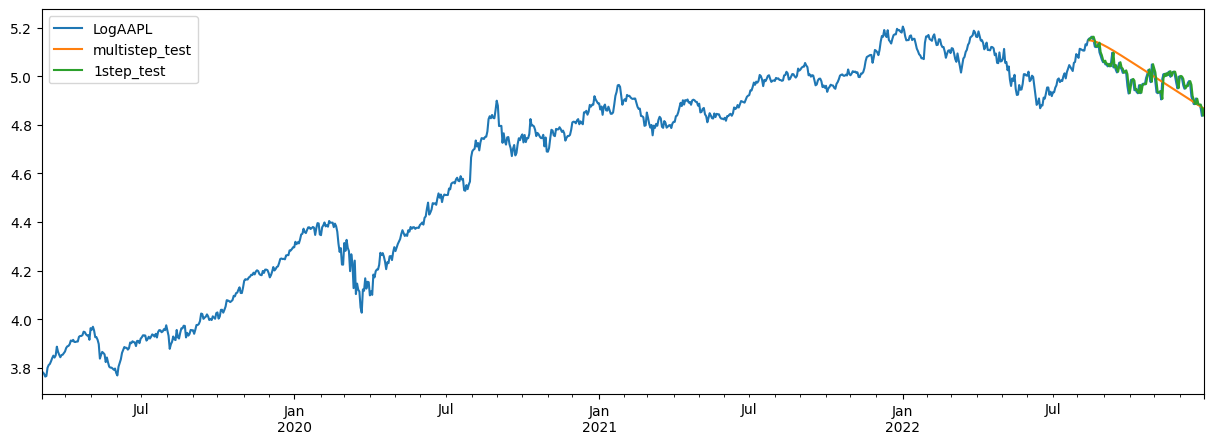

In [185]:
# plot 1-step and multi-step forecast
df[['LogAAPL', 'multistep_test', '1step_test']].plot(figsize=(15, 5));

## Multi-Output Forecast

This code snippet is preparing data for multi-output forecasting using Recurrent Neural Networks (RNNs).

In [131]:
series.shape

(1000,)

In [186]:
# Make multi-output supervised dataset
Tx = 100 # recall: using the past T=100 observations to forecast the next one.
Ty = test_period # number of forecasts into the future = 100

# Create input-output pairs
X = np.array([series[t:t+Tx] for t in range(len(series) - Tx - Ty+1)]).reshape(-1, Tx, 1)
Y = np.array([series[t+Tx:t+Tx+Ty] for t in range(len(series) - Tx - Ty+1)]).reshape(-1, Ty)
N = len(X)

print("X:", X.shape, "Y:", Y.shape, "N:", N)


X: (801, 100, 1) Y: (801, 100) N: 801


In [133]:
X[:-1].shape

(800, 100, 1)

In [134]:
X[-1:].shape

(1, 100, 1)

In [135]:
Xtrain_mo, Ytrain_mo = X[:-1], Y[:-1]
Xtest_mo, Ytest_mo = X[-1:], Y[-1:]

In [136]:
n_features = 1 
inputs = keras.Input(shape=(Tx, n_features))
x = layers.LSTM(16 , return_sequences=False)(inputs)

# or we could do
# x = layers.LSTM(16 , return_sequences=True)(inputs)
# x = layers.GlobalMaxPooling1D()(x)
outputs = layers.Dense(Ty)(x)
model = keras.Model(inputs, outputs)

model.summary() 

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 100, 1)]          0         
                                                                 
 lstm_5 (LSTM)               (None, 16)                1152      
                                                                 
 dense_7 (Dense)             (None, 100)               1700      
                                                                 
Total params: 2,852
Trainable params: 2,852
Non-trainable params: 0
_________________________________________________________________


In [137]:
callbacks = [
    keras.callbacks.ModelCheckpoint("LSTM_Multiple_output.keras",
                                    save_best_only=True)
]
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
history = model.fit(Xtrain_mo, Ytrain_mo,
                    epochs=20,
                    validation_data=(Xtest_mo,Ytest_mo),
                    callbacks=callbacks)


Epoch 1/20
25/25 [==============================] - 3s 25ms/step - loss: 4.8853e-04 - mae: 0.0155 - val_loss: 5.4788e-04 - val_mae: 0.0175
Epoch 2/20
25/25 [==============================] - 0s 8ms/step - loss: 4.8804e-04 - mae: 0.0155 - val_loss: 5.4487e-04 - val_mae: 0.0175
Epoch 3/20
25/25 [==============================] - 0s 7ms/step - loss: 4.8810e-04 - mae: 0.0155 - val_loss: 5.5218e-04 - val_mae: 0.0176
Epoch 4/20
25/25 [==============================] - 0s 6ms/step - loss: 4.8807e-04 - mae: 0.0155 - val_loss: 5.5092e-04 - val_mae: 0.0176
Epoch 5/20
25/25 [==============================] - 0s 7ms/step - loss: 4.8808e-04 - mae: 0.0155 - val_loss: 5.4755e-04 - val_mae: 0.0175
Epoch 6/20
25/25 [==============================] - 0s 7ms/step - loss: 4.8807e-04 - mae: 0.0155 - val_loss: 5.5094e-04 - val_mae: 0.0176
Epoch 7/20
25/25 [==============================] - 0s 7ms/step - loss: 4.8807e-04 - mae: 0.0155 - val_loss: 5.4783e-04 - val_mae: 0.0176
Epoch 8/20
25/25 [===============

In [138]:
# load best model
model = tf.keras.models.load_model('LSTM_Multiple_output.keras')

In [139]:
train_predictions = model.predict(Xtrain_mo)
test_predictions = model.predict(Xtest_mo)

1/1 [==============================] - 0s 331ms/step


In [140]:
train_predictions.shape, test_predictions.shape

((800, 100), (1, 100))

In [141]:
train_predictions = train_predictions[:,0]
test_predictions = test_predictions[0]

In [142]:
# save multi-output forecast to dataframe
df.loc[test_indicator, 'multioutput_test'] = last_train + np.cumsum(test_predictions)

In [143]:
df.tail()

,AAPL,LogAAPL,DiffLogAAPL,Lag_LogAAPL,1step_train,1step_test,multistep_test,multioutput_test
2022-12-26,131.860001,4.881741,0.000000,4.881741,NaN,4.877718,4.878057,5.271899
2022-12-27,130.029999,4.867765,-0.013976,4.881741,NaN,4.877891,4.874977,5.273437
2022-12-28,126.040001,4.836599,-0.031166,4.867765,NaN,4.863825,4.871896,5.274701
2022-12-29,129.610001,4.864530,0.027931,4.836599,NaN,4.832125,4.868816,5.275473
2022-12-30,129.929993,4.866996,0.002466,4.864530,NaN,4.860583,4.865736,5.276199


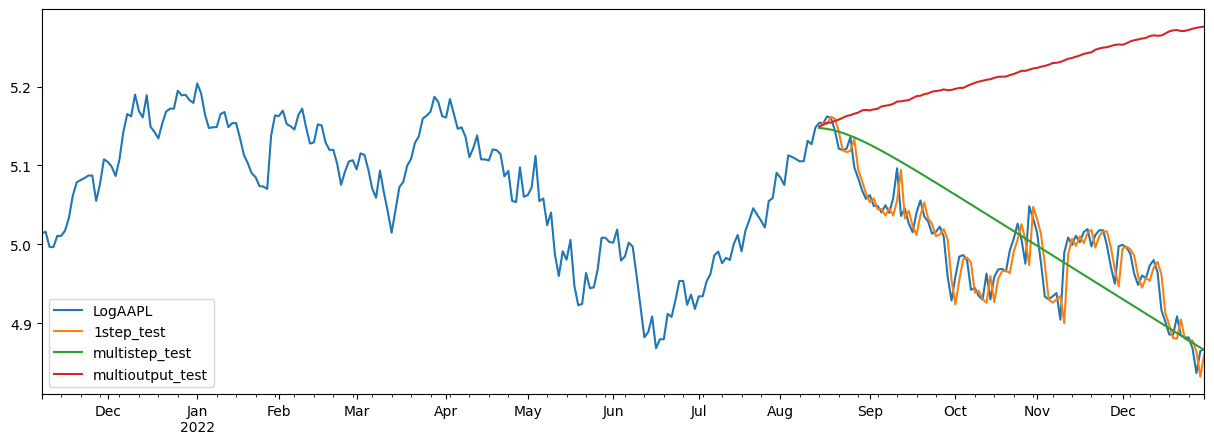

In [144]:
# plot all forecasts
cols = ['LogAAPL', '1step_test', 'multistep_test',  'multioutput_test']
df.iloc[-300:][cols].plot(figsize=(15, 5));

# Forecast comparison

In [145]:
# MAE
test_log_price = df.iloc[-test_period:]['LogAAPL']
mae1 = mean_absolute_error(test_log_price, df.loc[test_indicator, '1step_test'])
mae2 = mean_absolute_error(test_log_price, df.loc[test_indicator, 'multistep_test'])
mae3 = mean_absolute_error(test_log_price, df.loc[test_indicator, 'multioutput_test'])
print("1step_test MAE:", mae1)
print("multi-step MAE:", mae2)
print("multi-output MAE:", mae3)



1step_test MAE: 0.017304980400337656
multi-step MAE: 0.04810360087343185
multi-output MAE: 0.22012523856441774


In [146]:
# MAPE
mape1 = mean_absolute_percentage_error(test_log_price, df.loc[test_indicator, '1step_test'])
mape2 = mean_absolute_percentage_error(test_log_price, df.loc[test_indicator, 'multistep_test'])
mape3 = mean_absolute_percentage_error(test_log_price, df.loc[test_indicator, 'multioutput_test'])
print("1step_test MAE:", mape1)
print("multi-step MAE:", mape2)
print("multi-output MAE:", mape3)

1step_test MAE: 0.0034676971582907807
multi-step MAE: 0.00963575140303034
multi-output MAE: 0.04433992641947665


Done!